# **Data collection**

### Read data into dataframe

In [1711]:
import pandas as pd # open source data analysis and manipulation tool
animals = pd.read_csv("./animals_feed.csv") # read csv file
print('read successfully')

read successfully


### Check dimension of dataframe

In [1712]:
animals.shape # check dimension of datframe

(20, 10)

### Check first colums of dataframe

In [1713]:
animals.head() # print dataframe 

,id,animal,mammal,carrot vegetable,chicken meat,pork meat,grains vegetable,mouse meat,spider insect,leaves vegetable
0,1,Iberian hare,yes,yes,no,no,yes,no,no,no
1,2,Golden retriever,yes,yes,yes,yes,yes,no,no,no
2,3,balinese cat,yes,yes,yes,yes,no,yes,no,no
3,4,sparrow,no,yes,no,no,yes,no,yes,yes
4,5,coati,yes,yes,no,no,no,yes,no,no


# **Data understanding**

### Check existing names

In [1714]:
import re # regular expression
column_names = list(animals.columns.values)
print([match.group(0) for column_name in column_names for match in [(re.compile(".*(meat).*")).search(column_name)] if match])
print([match.group(0) for column_name in column_names for match in [(re.compile(".*(veg).*")).search(column_name)] if match])
print([match.group(0) for column_name in column_names for match in [(re.compile(".*(insec).*")).search(column_name)] if match])

['chicken meat', 'pork meat', 'mouse meat']
['carrot vegetable', 'grains vegetable', 'leaves vegetable']
['spider insect']


##### There are just as many types of vegetables as there are types of meat in the dataframe

In [1715]:
animals["mammal"].value_counts() 

mammal
yes    16
no      4
Name: count, dtype: int64

##### There are more mammals than vertebrates in the dataframe

# **Data preparation**

### Check double entries

In [1716]:
animals['animal'].value_counts()

animal
Iberian hare         1
Golden retriever     1
tortoise             1
border collie        1
Whinchat             1
Adder                1
Java Leopard         1
Lion                 1
Bombay cat           1
icebear              1
Indian sloth bear    1
Lowland gorilla      1
Bonobo monkey        1
Bearded monkey       1
Jaguar               1
Warthog              1
coati                1
sparrow              1
balinese cat         1
Guinea pig           1
Name: count, dtype: int64

##### there a no double entries

### change column values 

In [1717]:
animals.loc[animals["mammal"] == "yes","mammal"] = "mammal"
animals.loc[animals["mammal"] == "no","mammal"] = "vertebrate"
animals.head()


,id,animal,mammal,carrot vegetable,chicken meat,pork meat,grains vegetable,mouse meat,spider insect,leaves vegetable
0,1,Iberian hare,mammal,yes,no,no,yes,no,no,no
1,2,Golden retriever,mammal,yes,yes,yes,yes,no,no,no
2,3,balinese cat,mammal,yes,yes,yes,no,yes,no,no
3,4,sparrow,vertebrate,yes,no,no,yes,no,yes,yes
4,5,coati,mammal,yes,no,no,no,yes,no,no


In [1718]:
animals.loc[animals["animal"] == "Adder","mammal"] = "reptile"
animals.loc[animals["animal"] == "tortoise","mammal"] = "reptile"
animals[12:]

,id,animal,mammal,carrot vegetable,chicken meat,pork meat,grains vegetable,mouse meat,spider insect,leaves vegetable
12,13,Bombay cat,mammal,yes,yes,yes,no,yes,no,no
13,14,Lion,mammal,no,yes,yes,no,yes,no,no
14,15,Java Leopard,mammal,no,yes,yes,no,no,no,no
15,16,Adder,reptile,no,no,no,no,yes,no,no
16,17,Whinchat,vertebrate,no,no,no,no,no,yes,no
17,18,border collie,mammal,yes,yes,yes,yes,no,no,no
18,19,tortoise,reptile,no,no,no,no,no,no,yes
19,20,Guinea pig,mammal,yes,no,no,no,no,no,yes


### change column name

In [1719]:
column_names = animals.columns.values
column_names[2] = 'animal species'
animals.columns = column_names
animals.head()

,id,animal,animal species,carrot vegetable,chicken meat,pork meat,grains vegetable,mouse meat,spider insect,leaves vegetable
0,1,Iberian hare,mammal,yes,no,no,yes,no,no,no
1,2,Golden retriever,mammal,yes,yes,yes,yes,no,no,no
2,3,balinese cat,mammal,yes,yes,yes,no,yes,no,no
3,4,sparrow,vertebrate,yes,no,no,yes,no,yes,yes
4,5,coati,mammal,yes,no,no,no,yes,no,no


### unify column values

In [1720]:
animals["animal"] = animals["animal"].str.lower() # only small letters
animals.head()

,id,animal,animal species,carrot vegetable,chicken meat,pork meat,grains vegetable,mouse meat,spider insect,leaves vegetable
0,1,iberian hare,mammal,yes,no,no,yes,no,no,no
1,2,golden retriever,mammal,yes,yes,yes,yes,no,no,no
2,3,balinese cat,mammal,yes,yes,yes,no,yes,no,no
3,4,sparrow,vertebrate,yes,no,no,yes,no,yes,yes
4,5,coati,mammal,yes,no,no,no,yes,no,no


### count animal species

In [1721]:
animals['animal species'].value_counts() 

animal species
mammal        16
vertebrate     2
reptile        2
Name: count, dtype: int64

### change string to binary

In [1722]:
feed = animals.replace(to_replace="yes", value=1)
feed = feed.replace(to_replace="no", value=0)
feed.head()

,id,animal,animal species,carrot vegetable,chicken meat,pork meat,grains vegetable,mouse meat,spider insect,leaves vegetable
0,1,iberian hare,mammal,1,0,0,1,0,0,0
1,2,golden retriever,mammal,1,1,1,1,0,0,0
2,3,balinese cat,mammal,1,1,1,0,1,0,0
3,4,sparrow,vertebrate,1,0,0,1,0,1,1
4,5,coati,mammal,1,0,0,0,1,0,0


# **Model modeling**

In [1723]:
from sklearn import tree # A decision tree classifier

##### get training data

In [1724]:
feed_droped_columns = feed.drop(['id','animal'], axis=1)
feed_split_columns = feed_droped_columns[:16]
feed_grouped_columns = feed_split_columns.groupby(["animal species"],group_keys=False)
feed_mean_columns = feed_grouped_columns.mean()

# training data  
training_labels = feed_mean_columns.index
training_data = feed_mean_columns

##### get test data

In [1725]:
test_feed_split_columns = feed_droped_columns[16:]
test_feed_split_columns

# test data  
test_labels = test_feed_split_columns['animal species']
test_data = test_feed_split_columns.drop(['animal species'], axis=1)

##### create decision tree

In [1726]:
decision_tree = tree.DecisionTreeClassifier(max_depth=2)
decision_tree.fit(training_data, training_labels)
print("decision tree created")

decision tree created


In [1727]:
from matplotlib import pyplot as plt # comprehensive library for creating static, animated, and interactive visualizations 

[Text(0.6, 0.8333333333333334, 'chicken meat <= 0.286\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1]\nclass = mammal'),
 Text(0.4, 0.5, 'carrot vegetable <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = reptile'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = reptile'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = vertebrate'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = mammal')]

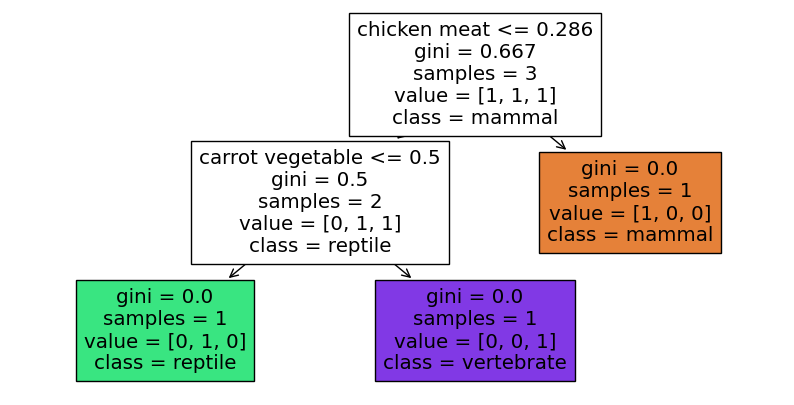

In [1728]:
fig = plt.figure(figsize=(10,5))
tree.plot_tree(decision_tree, feature_names=training_data.columns.values, class_names=training_labels,filled=True)

In [1729]:
test_decision_tree = decision_tree.predict(test_data)
print("prediction created")

prediction created


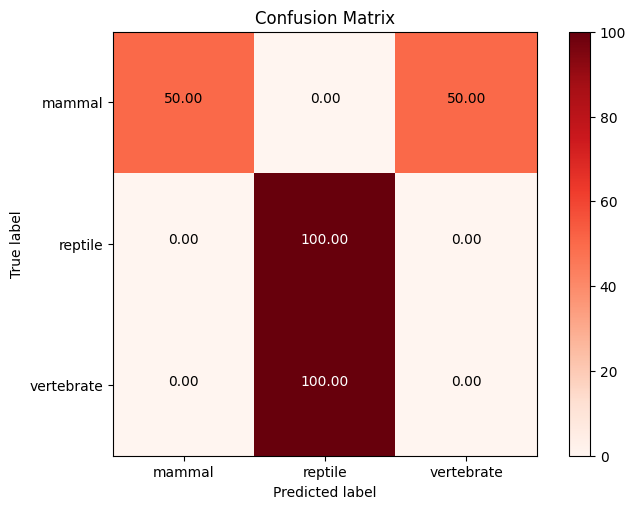

In [1730]:
import numpy as np # multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions
from sklearn.metrics import confusion_matrix
import itertools # various functions that work on iterators

test_labels_unique = np.unique(test_labels)
confusion_matrix = confusion_matrix(test_labels, test_decision_tree, labels = test_labels_unique)
title = 'Confusion Matrix'
cmap = plt.cm.Reds

plt.figure(figsize=(7, 5))
confusion_matrix = (confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]) * 100
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_labels_unique))
plt.xticks(tick_marks, test_labels_unique)
plt.yticks(tick_marks, test_labels_unique)

fmt = '.2f'
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()